In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 



In [14]:
st_df = pd.read_csv("user_session_merged.csv")

/tmp/ipykernel_95440/2614106336.py:1: DtypeWarning: Columns (2,3,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  st_df = pd.read_csv("user_session_merged.csv")


In [23]:
sessions = pd.read_csv("sessions.csv")

In [36]:
st_df

,user_id,action,action_type,action_detail,device_type,secs_elapsed,date_account_created,date_first_booking,timestamp_first_active,affiliate_channel,session_timestamp
0,toga865pvz,10,message_post,message_post,iPhone,38113.0,2014-01-01,NaN,2014-01-01 02:32:47,api,2014-01-01 13:08:00
1,uyb283j6j0,10,message_post,message_post,iPhone,42635.0,2014-01-01,2014-01-01,2014-01-01 17:33:17,direct,2014-01-02 05:23:52
2,d3f3myba0i,10,message_post,message_post,iPhone,16074.0,2014-01-01,2014-01-01,2014-01-01 22:35:37,direct,2014-01-02 03:03:31
3,8766khns50,10,message_post,message_post,iPhone,126000.0,2014-01-03,NaN,2014-01-03 07:03:32,direct,2014-01-04 18:03:32
4,8766khns50,10,message_post,message_post,iPhone,184000.0,2014-01-03,NaN,2014-01-03 07:03:32,direct,2014-01-05 10:10:12
...,...,...,...,...,...,...,...,...,...,...,...
9092121,osn94hm062,zendesk_login_jwt,-unknown-,-unknown-,Mac Desktop,18959.0,NaT,NaN,NaN,NaN,NaT
9092122,cpszutqnd1,zendesk_login_jwt,-unknown-,-unknown-,Mac Desktop,21890.0,NaT,NaN,NaN,NaN,NaT
9092123,ii1y9pqmsc,zendesk_login_jwt,-unknown-,-unknown-,Mac Desktop,10513.0,NaT,NaN,NaN,NaN,NaT
9092124,ssqamfzu1e,zendesk_login_jwt,-unknown-,-unknown-,Windows Desktop,1222.0,NaT,NaN,NaN,NaN,NaT


/tmp/ipykernel_95440/1905353446.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['account_age_hours'] = (data['session_timestamp'] - data['date_account_created']).dt.total_seconds() // 3600
/tmp/ipykernel_95440/1905353446.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_bin'] = pd.cut(data['account_age_hours'], bins=bins, labels=bins[:-1])
/tmp/ipykernel_95440/1905353446.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version o

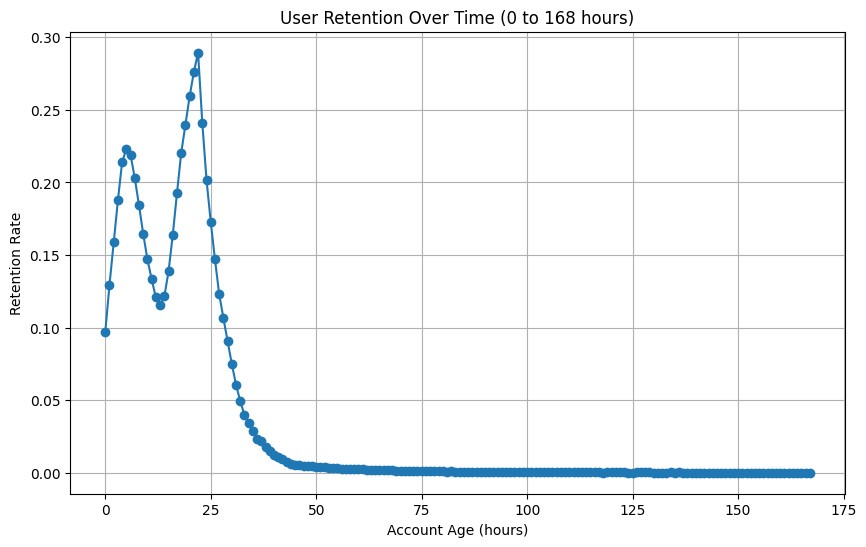

In [22]:
data = st_df

# Convert date columns to datetime
data['date_account_created'] = pd.to_datetime(data['date_account_created'], errors='coerce')
data['session_timestamp'] = pd.to_datetime(data['session_timestamp'], errors='coerce')

# Drop rows with invalid date conversions
data = data.dropna(subset=['date_account_created', 'session_timestamp'])

# Calculate the number of hours between account creation and session timestamps
data['account_age_hours'] = (data['session_timestamp'] - data['date_account_created']).dt.total_seconds() // 3600

# Define bins for each hour from 0 to 168 (7 days)
bins = list(range(0, 169, 1))
data['age_bin'] = pd.cut(data['account_age_hours'], bins=bins, labels=bins[:-1])

# Calculate retention for each hour
retention_counts = data.groupby('age_bin')['user_id'].nunique()
initial_users = data['user_id'].nunique()
retention_rates = retention_counts / initial_users

# Plot the retention rates
plt.figure(figsize=(10, 6))
plt.plot(retention_rates.index.astype(int), retention_rates.values, marker='o', linestyle='-')
plt.xlabel('Account Age (hours)')
plt.ylabel('Retention Rate')
plt.title('User Retention Over Time (0 to 168 hours)')
plt.grid(True)
plt.show()

user_id
00023iyk9l     241.082222
0010k6l0om     162.928611
001wyh0pz8      78.601389
0028jgx1x1      82.502778
002qnbzfs5    1801.966667
                 ...     
zzxox7jnrx     177.621111
zzy7t0y9cm      20.491944
zzysuoqg6x       0.480833
zzywmcn0jv     597.208056
zzzlylp57e     119.710833
Name: secs_elapsed, Length: 135483, dtype: float64
Retention rate over 168 hours: 58.48%


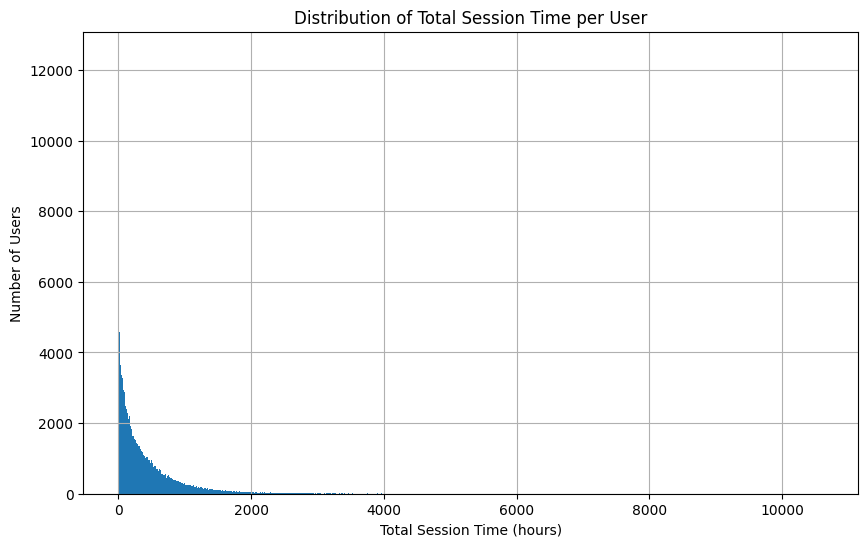

In [28]:
data = sessions

# Display the first few rows to understand the structure
data.head()

# Calculate total session time per user in hours
data['secs_elapsed'] = data['secs_elapsed'].fillna(0)  # Fill missing values with 0
user_session_time = data.groupby('user_id')['secs_elapsed'].sum() / 3600  # Convert seconds to hours

# Display the total session time per user
print(user_session_time)
# Define the retention period in hours (7 days)
retention_period_hours = 7 * 24

# Calculate retention: users with session time greater than or equal to the retention period
retained_users = user_session_time[user_session_time >= retention_period_hours].count()
initial_users = user_session_time.count()

# Calculate the retention rate
retention_rate = retained_users / initial_users

print(f"Retention rate over {retention_period_hours} hours: {retention_rate:.2%}")
import matplotlib.pyplot as plt

# Plot the distribution of session times
plt.figure(figsize=(10, 6))
user_session_time.hist(bins=1000)
plt.xlabel('Total Session Time (hours)')
plt.ylabel('Number of Users')
plt.title('Distribution of Total Session Time per User')
plt.grid(True)
plt.show()


폐기

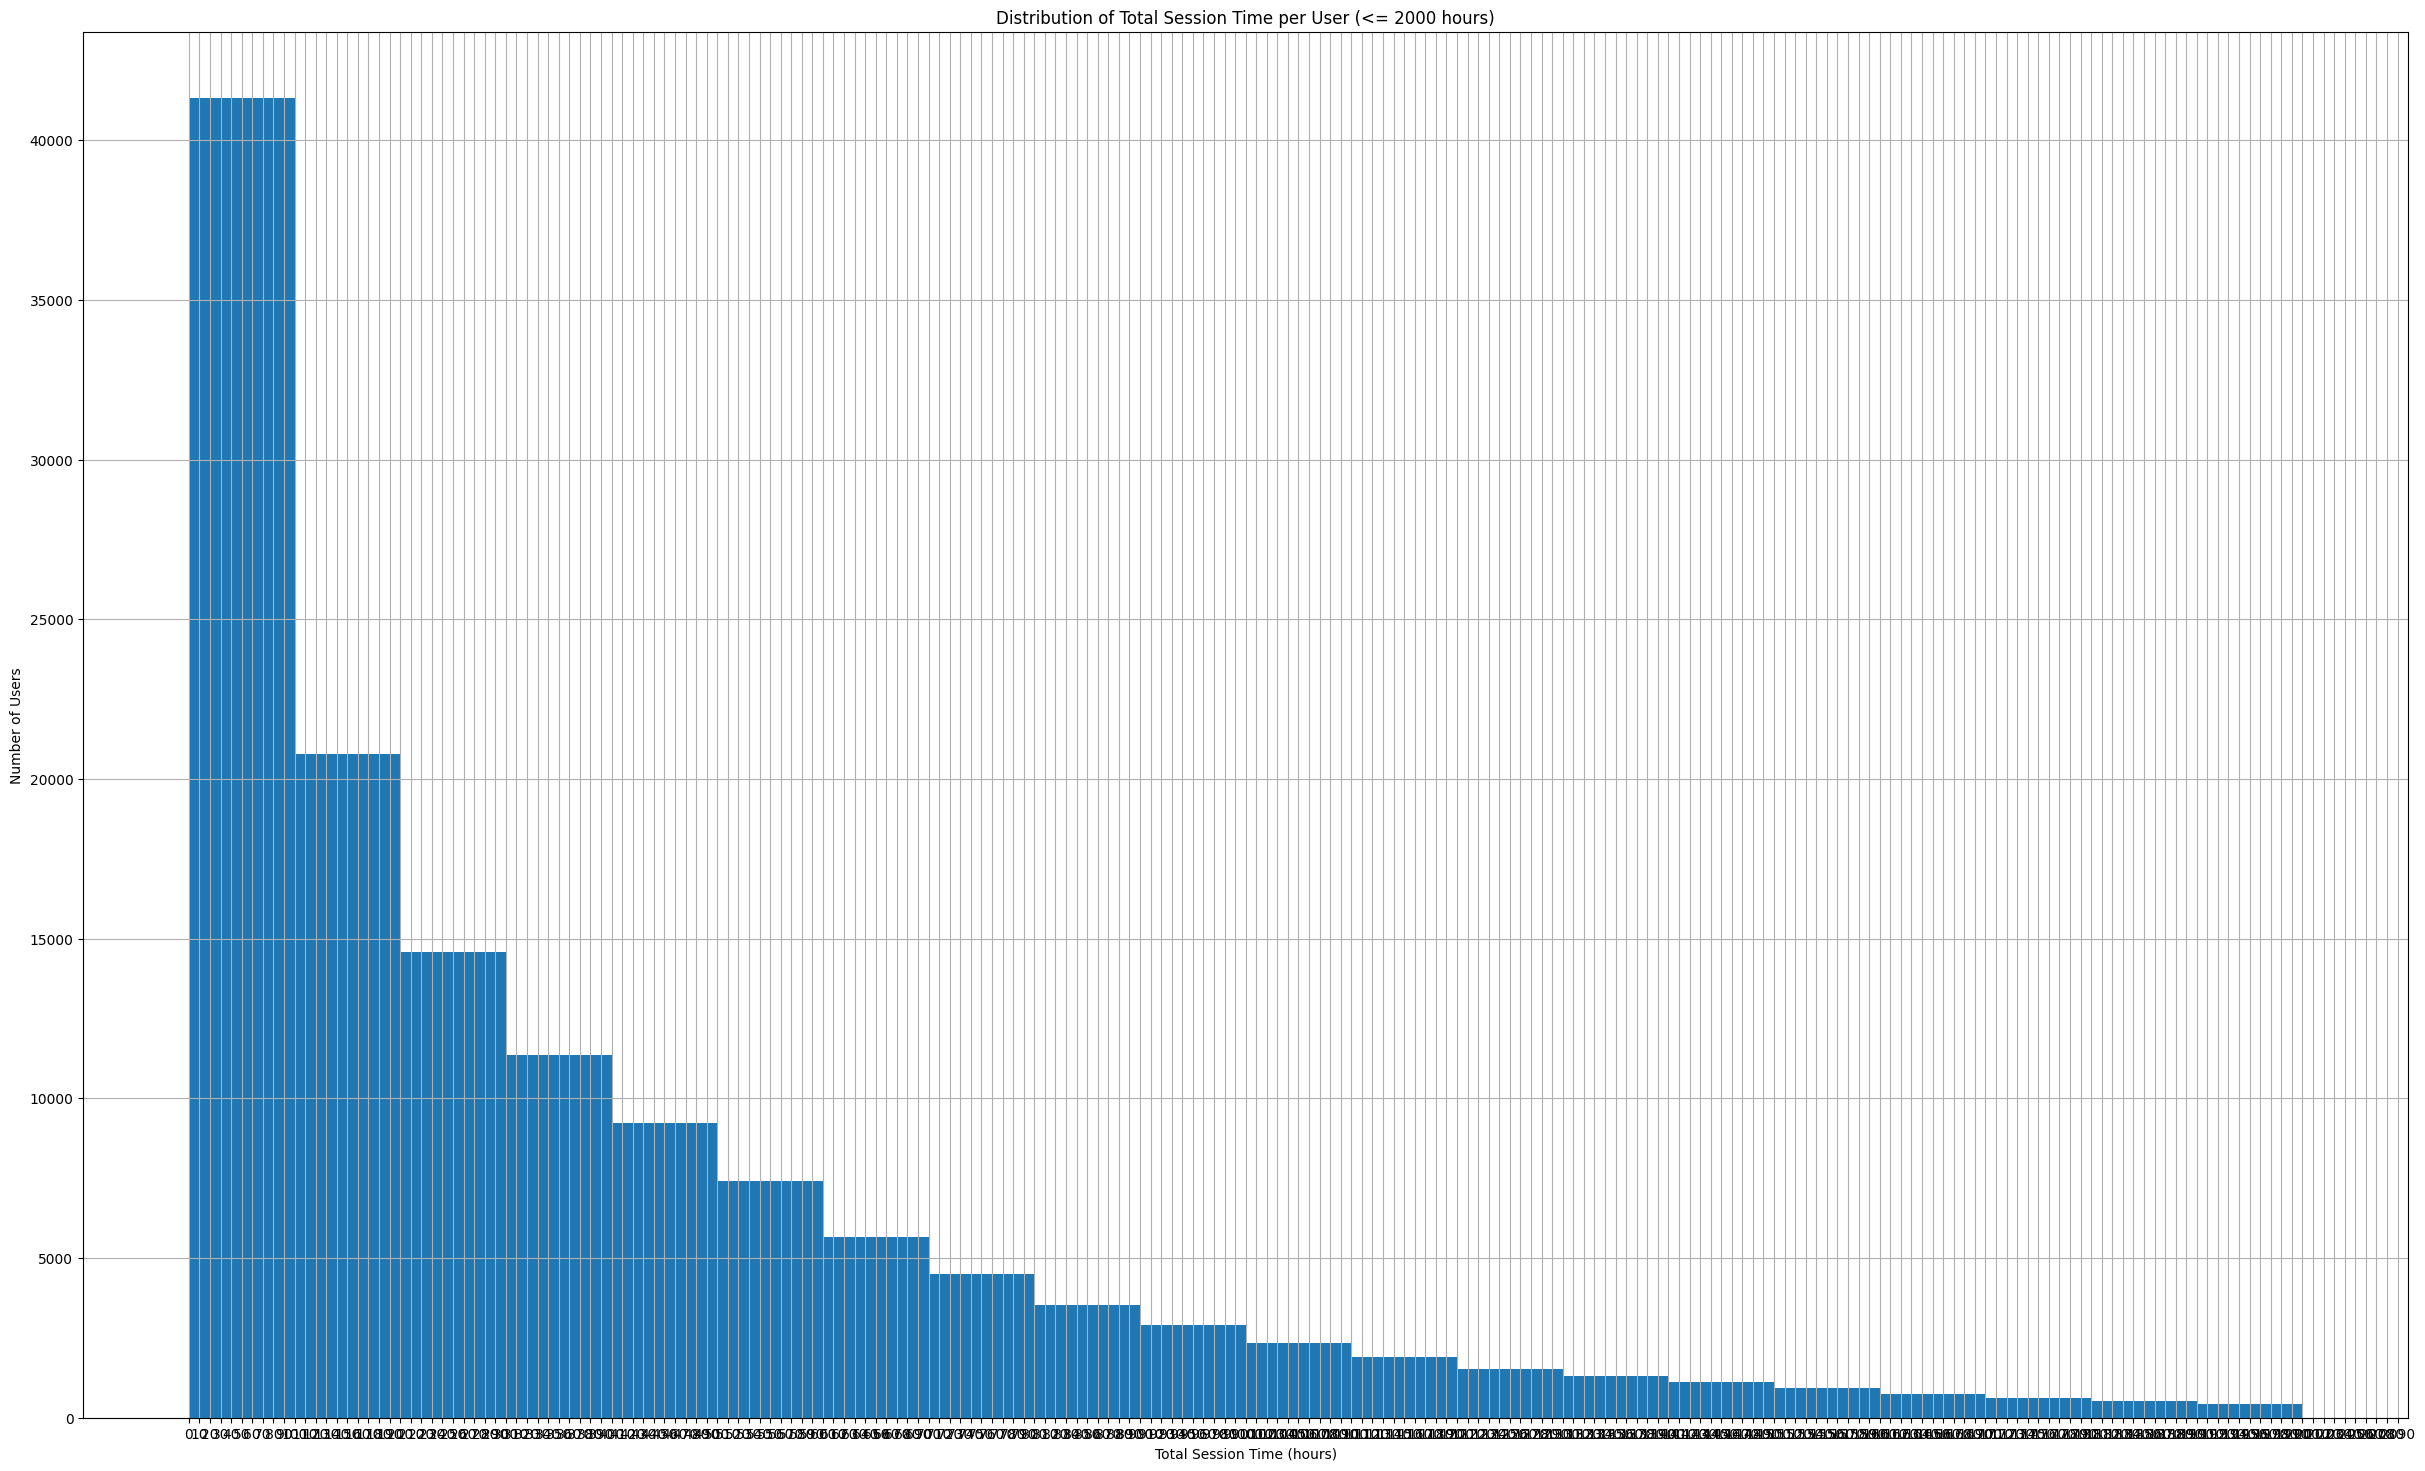

In [31]:
# Filter out users with total session time greater than 2000 hours
filtered_session_time = user_session_time[user_session_time <= 2000]

# Plot the distribution of session times with x-axis in 100 hour intervals
plt.figure(figsize=(30, 18))
filtered_session_time.hist(bins=range(0, 2100, 100))
plt.xlabel('Total Session Time (hours)')
plt.ylabel('Number of Users')
plt.title('Distribution of Total Session Time per User (<= 2000 hours)')
plt.grid(True)
plt.xticks(range(0, 2100, 10))  # Set x-axis ticks at 100 hour intervals
plt.show()

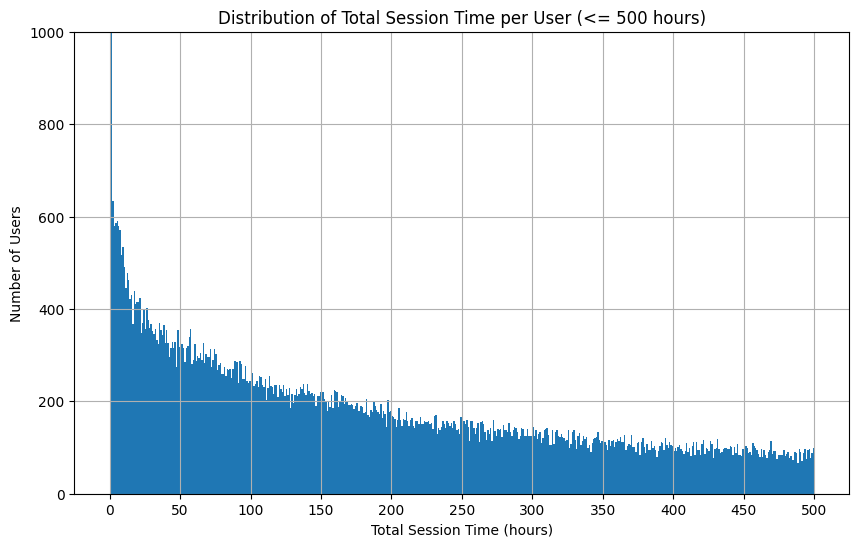

In [34]:
# Filter out users with total session time greater than 500 hours
filtered_session_time = user_session_time[user_session_time <= 500]

# Plot the distribution of session times with x-axis in 1 hour intervals
plt.figure(figsize=(10, 6))
filtered_session_time.hist(bins=range(0, 501, 1))
plt.xlabel('Total Session Time (hours)')
plt.ylabel('Number of Users')
plt.title('Distribution of Total Session Time per User (<= 500 hours)')
plt.grid(True)
plt.xticks(range(0, 501, 50))  # Set x-axis ticks at 50 hour intervals
plt.ylim(0, 1000)  # Set y-axis limit from 0 to 2000
plt.show()

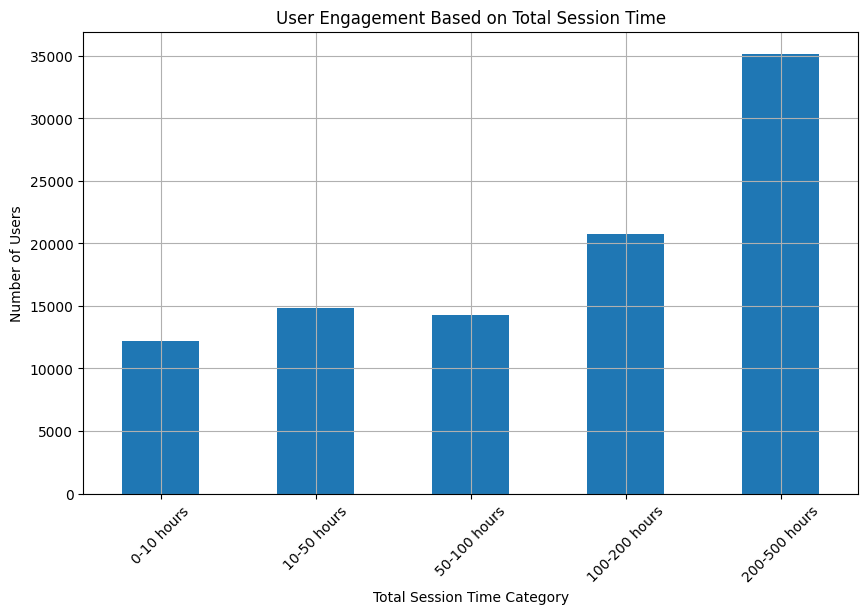

In [35]:
data['secs_elapsed'] = data['secs_elapsed'].fillna(0)  # Fill missing values with 0
user_session_time = data.groupby('user_id')['secs_elapsed'].sum() / 3600  # Convert seconds to hours

# Categorize users based on total session time
bins = [0, 10, 50, 100, 200, 500]
labels = ['0-10 hours', '10-50 hours', '50-100 hours', '100-200 hours', '200-500 hours']
user_session_time_category = pd.cut(user_session_time, bins=bins, labels=labels, right=False)

# Count users in each category
category_counts = user_session_time_category.value_counts().sort_index()

# Plot the user engagement categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel('Total Session Time Category')
plt.ylabel('Number of Users')
plt.title('User Engagement Based on Total Session Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

폐기

/tmp/ipykernel_95440/872468430.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  booking_rate_per_category = first_booking_per_user.groupby(filtered_session_time_category).mean()


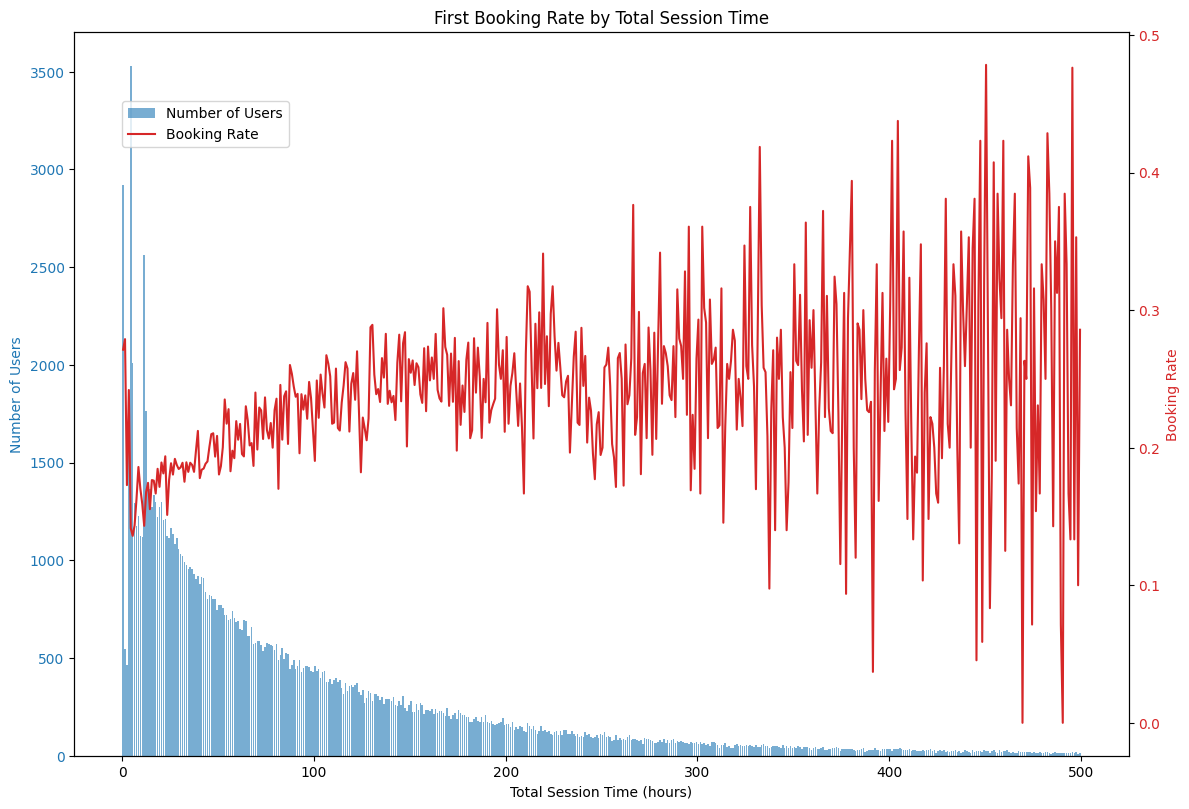

In [38]:
data = st_df

# Calculate total session time per user in hours
data['secs_elapsed'] = data['secs_elapsed'].fillna(0)  # Fill missing values with 0
user_session_time = data.groupby('user_id')['secs_elapsed'].sum() / 3600  # Convert seconds to hours

# Filter out users with total session time greater than 500 hours
filtered_session_time = user_session_time[user_session_time <= 500]

# Categorize users based on total session time
bins = range(0, 501, 1)
filtered_session_time_category = pd.cut(filtered_session_time, bins=bins, right=False)

# Calculate the count of users in each category
category_counts = filtered_session_time_category.value_counts().sort_index()

# Calculate the proportion of users who made their first booking in each category
data['has_first_booking'] = ~data['date_first_booking'].isna()
first_booking_per_user = data.groupby('user_id')['has_first_booking'].max()
first_booking_per_user = first_booking_per_user[filtered_session_time.index]  # Filter to match session times

booking_rate_per_category = first_booking_per_user.groupby(filtered_session_time_category).mean()

# Plot the distribution of session times and the booking rate
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for the number of users in each category
color = 'tab:blue'
ax1.set_xlabel('Total Session Time (hours)')
ax1.set_ylabel('Number of Users', color=color)
ax1.bar(category_counts.index.categories.mid, category_counts.values, color=color, alpha=0.6, label='Number of Users')
ax1.tick_params(axis='y', labelcolor=color)

# Line plot for the booking rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Booking Rate', color=color)
ax2.plot(booking_rate_per_category.index.categories.mid, booking_rate_per_category.values, color=color, label='Booking Rate')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('First Booking Rate by Total Session Time')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

plt.show()

/tmp/ipykernel_95440/511762058.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  booking_rate_per_category = first_booking_per_user.groupby(filtered_session_time_category).mean()


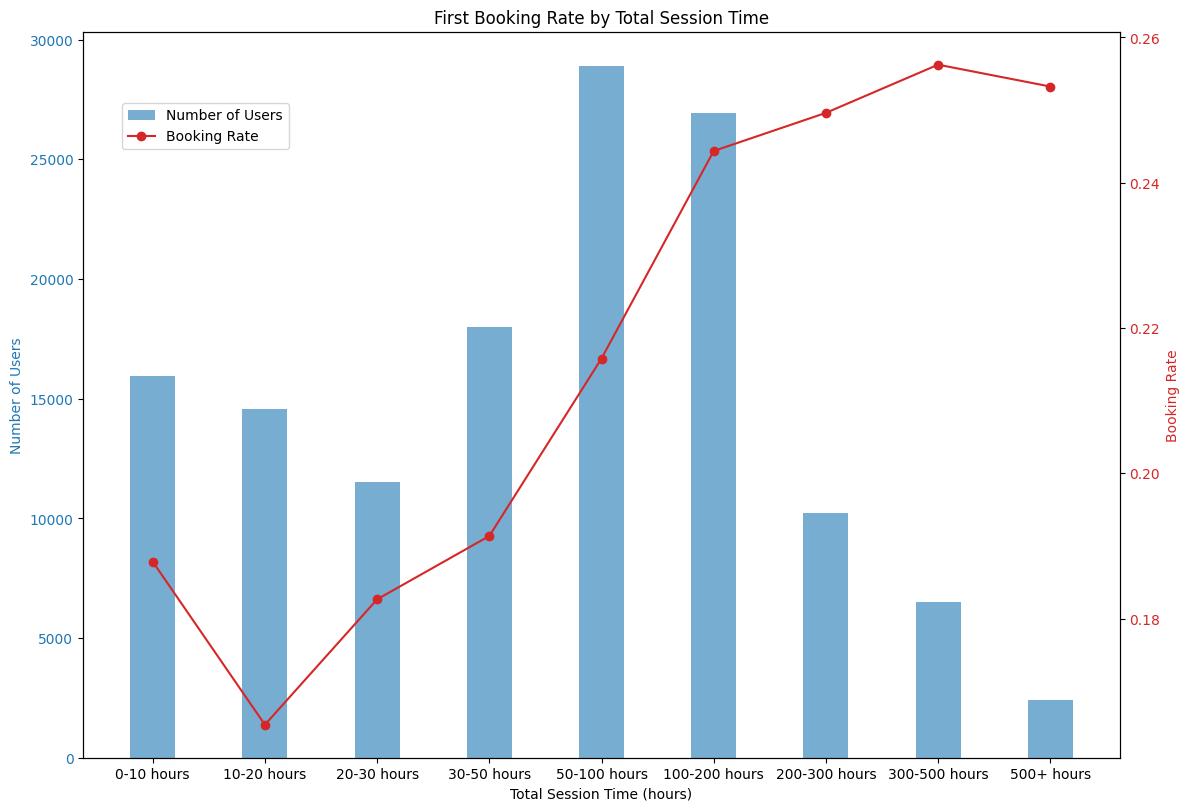

In [42]:
data = st_df

# Calculate total session time per user in hours
data['secs_elapsed'] = data['secs_elapsed'].fillna(0)  # Fill missing values with 0
user_session_time = data.groupby('user_id')['secs_elapsed'].sum() / 3600  # Convert seconds to hours

# Define bins and labels for total session time groups
max_time = user_session_time.max()
bins = [0, 10, 20, 30, 50, 100, 200, 300, 500, max_time]
labels = ['0-10 hours', '10-20 hours', '20-30 hours', '30-50 hours', '50-100 hours', '100-200 hours', '200-300 hours', '300-500 hours', '500+ hours']
filtered_session_time_category = pd.cut(user_session_time, bins=bins, labels=labels, right=False)

# Calculate the count of users in each category
category_counts = filtered_session_time_category.value_counts().sort_index()

# Calculate the proportion of users who made their first booking in each category
data['has_first_booking'] = ~data['date_first_booking'].isna()
first_booking_per_user = data.groupby('user_id')['has_first_booking'].max()
first_booking_per_user = first_booking_per_user[user_session_time.index]  # Filter to match session times

booking_rate_per_category = first_booking_per_user.groupby(filtered_session_time_category).mean()

# Plot the distribution of session times and the booking rate
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for the number of users in each category
color = 'tab:blue'
ax1.set_xlabel('Total Session Time (hours)')
ax1.set_ylabel('Number of Users', color=color)
ax1.bar(category_counts.index, category_counts.values, color=color, alpha=0.6, label='Number of Users', width=0.4)
ax1.tick_params(axis='y', labelcolor=color)

# Line plot for the booking rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Booking Rate', color=color)
ax2.plot(category_counts.index, booking_rate_per_category.values, color=color, marker='o', label='Booking Rate')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('First Booking Rate by Total Session Time')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

plt.show()

/tmp/ipykernel_95440/1226612365.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['first_booking_date'] = filtered_data['date_first_booking'].dt.date


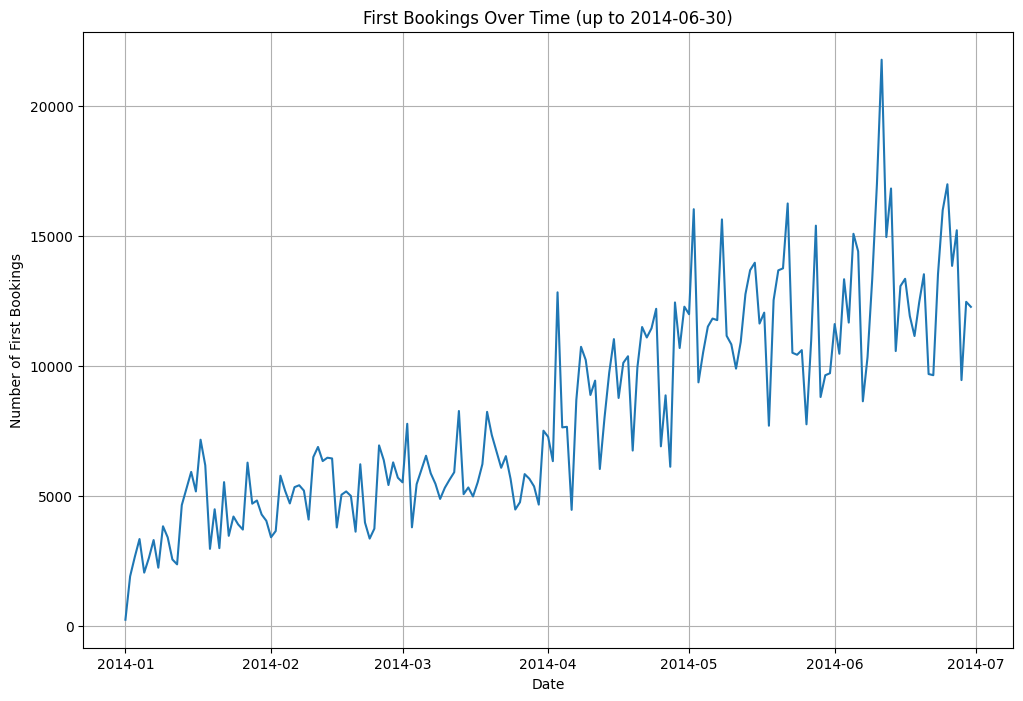

In [45]:
# Load the data
file_path = 'drop.csv'
data = pd.read_csv(file_path)

# Convert date columns to datetime
data['date_account_created'] = pd.to_datetime(data['date_account_created'], errors='coerce')
data['date_first_booking'] = pd.to_datetime(data['date_first_booking'], errors='coerce')

# Drop rows with invalid date conversions
data = data.dropna(subset=['date_account_created', 'date_first_booking'])

# Filter data to include only bookings up to 2014-06-30
end_date = pd.to_datetime('2014-06-30')
filtered_data = data[data['date_first_booking'] <= end_date]

# Extract the date of first booking
filtered_data['first_booking_date'] = filtered_data['date_first_booking'].dt.date

# Count the number of first bookings per date
first_booking_counts = filtered_data['first_booking_date'].value_counts().sort_index()

# Plot the number of first bookings over time
plt.figure(figsize=(12, 8))
first_booking_counts.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of First Bookings')
plt.title('First Bookings Over Time (up to 2014-06-30)')
plt.grid(True)
plt.show()

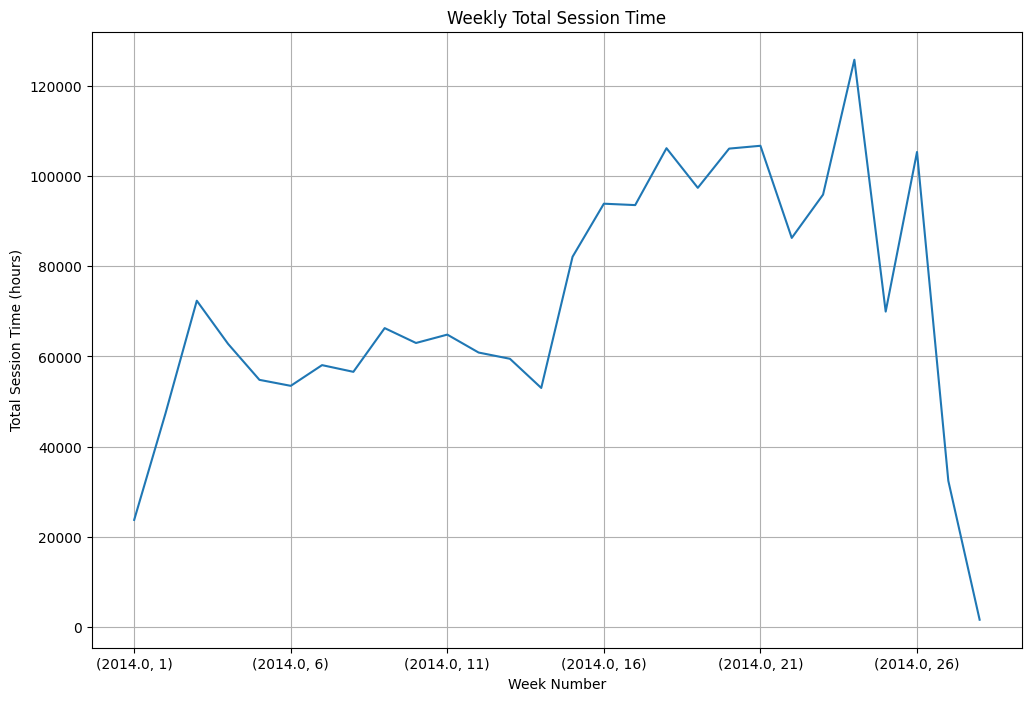

In [46]:
# Convert session timestamps to datetime
data['session_timestamp'] = pd.to_datetime(data['session_timestamp'], errors='coerce')

# Extract week number and year from session timestamps
data['week'] = data['session_timestamp'].dt.isocalendar().week
data['year'] = data['session_timestamp'].dt.year

# Calculate total session time per week
weekly_session_time = data.groupby(['year', 'week'])['secs_elapsed'].sum() / 3600  # Convert seconds to hours

# Plot the weekly session time
plt.figure(figsize=(12, 8))
weekly_session_time.plot(kind='line')
plt.xlabel('Week Number')
plt.ylabel('Total Session Time (hours)')
plt.title('Weekly Total Session Time')
plt.grid(True)
plt.show()


/tmp/ipykernel_95440/603670372.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['week'] = data['session_timestamp'].dt.isocalendar().week
/tmp/ipykernel_95440/603670372.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['session_timestamp'].dt.year
/tmp/ipykernel_95440/603670372.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

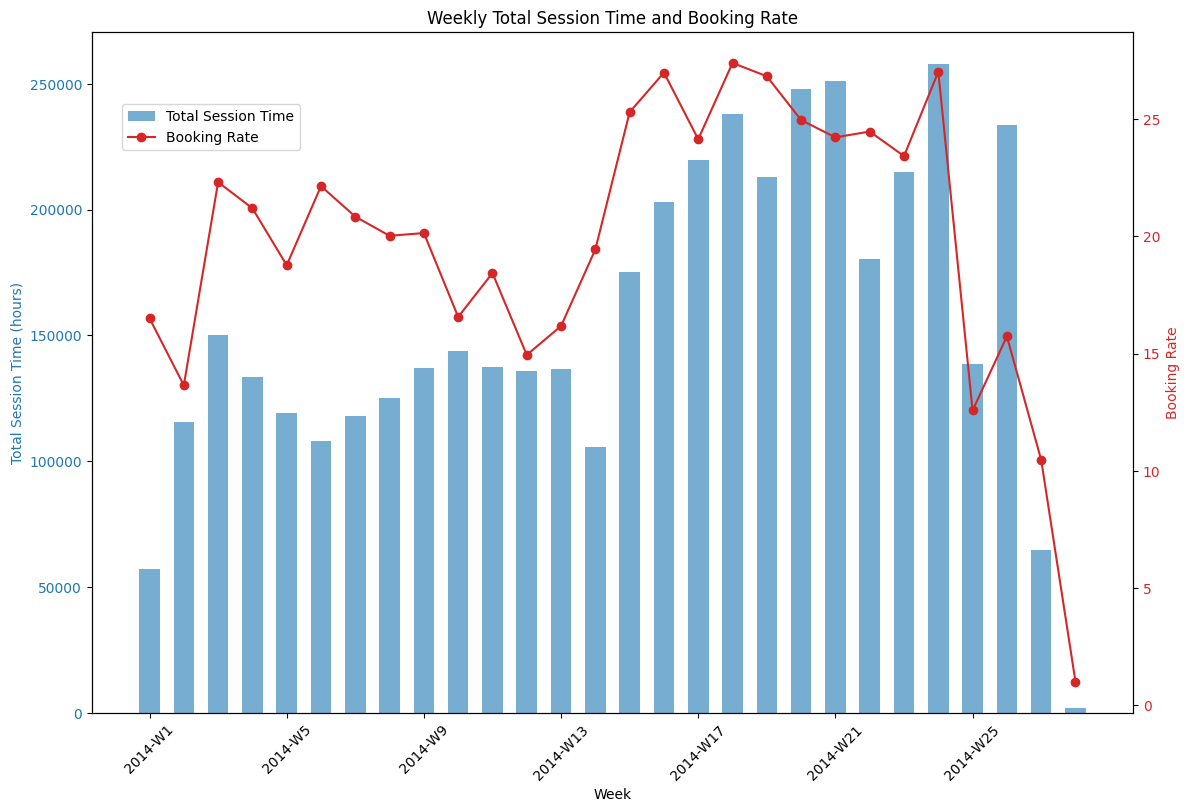

In [50]:
data = st_df

# Convert session timestamps to datetime
data['session_timestamp'] = pd.to_datetime(data['session_timestamp'], errors='coerce')
data['date_first_booking'] = pd.to_datetime(data['date_first_booking'], errors='coerce')

# Filter out rows with invalid session timestamps
data = data.dropna(subset=['session_timestamp'])

# Extract week number and year from session timestamps
data['week'] = data['session_timestamp'].dt.isocalendar().week
data['year'] = data['session_timestamp'].dt.year

# Calculate total session time per week
weekly_session_time = data.groupby(['year', 'week'])['secs_elapsed'].sum() / 3600  # Convert seconds to hours

# Calculate booking rate per week
data['has_booking'] = ~data['date_first_booking'].isna()
weekly_bookings = data.groupby(['year', 'week'])['has_booking'].sum()
weekly_users = data.groupby(['year', 'week'])['user_id'].nunique()
weekly_booking_rate = weekly_bookings / weekly_users

# Create a new index for plotting
weekly_index = [f'{int(year)}-W{int(week)}' for year, week in weekly_session_time.index]

# Plot the weekly session time and booking rate
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for weekly session time
color = 'tab:blue'
ax1.set_xlabel('Week')
ax1.set_ylabel('Total Session Time (hours)', color=color)
ax1.bar(weekly_index, weekly_session_time.values, color=color, alpha=0.6, label='Total Session Time', width=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(weekly_index[::4])  # Show every 4th week label for better readability
ax1.set_xticklabels(weekly_index[::4], rotation=45)

# Line plot for weekly booking rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Booking Rate', color=color)
ax2.plot(weekly_index, weekly_booking_rate.values, color=color, marker='o', label='Booking Rate')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Weekly Total Session Time and Booking Rate')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

plt.show()

코호트는 누적형이라 의미없어보임 폐기

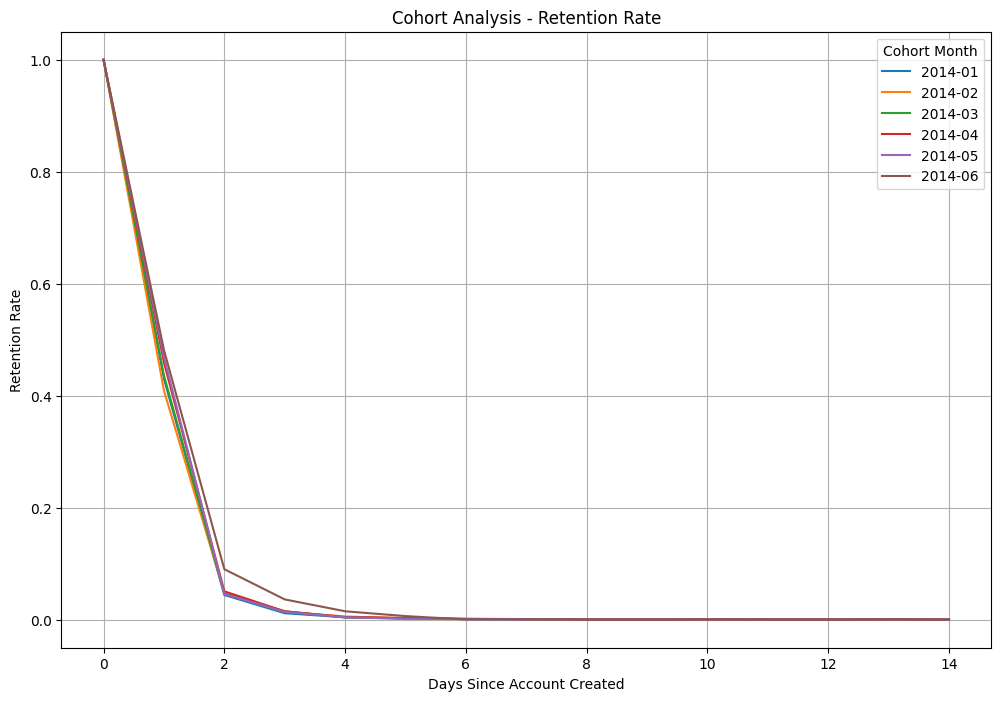

In [52]:
# Convert date columns to datetime
data['date_account_created'] = pd.to_datetime(data['date_account_created'], errors='coerce')
data['session_timestamp'] = pd.to_datetime(data['session_timestamp'], errors='coerce')

# Drop rows with invalid date conversions
data = data.dropna(subset=['date_account_created', 'session_timestamp'])

# Create a cohort based on the month of account creation
data['cohort_month'] = data['date_account_created'].dt.to_period('M')

# Calculate the number of days since account creation for each session
data['days_since_created'] = (data['session_timestamp'] - data['date_account_created']).dt.days

# Group data by cohort and days since creation
cohort_data = data.groupby(['cohort_month', 'days_since_created']).agg({'user_id': 'nunique'}).reset_index()

# Pivot the data
cohort_pivot = cohort_data.pivot(index='cohort_month', columns='days_since_created', values='user_id').fillna(0)

# Calculate the number of users in each cohort
cohort_sizes = cohort_pivot.iloc[:, 0]

# Calculate retention rate
retention = cohort_pivot.divide(cohort_sizes, axis=0)

# Plot retention rate
plt.figure(figsize=(12, 8))
plt.plot(retention.T)
plt.title('Cohort Analysis - Retention Rate')
plt.xlabel('Days Since Account Created')
plt.ylabel('Retention Rate')
plt.legend(retention.index.astype(str), title='Cohort Month')
plt.grid(True)
plt.show()

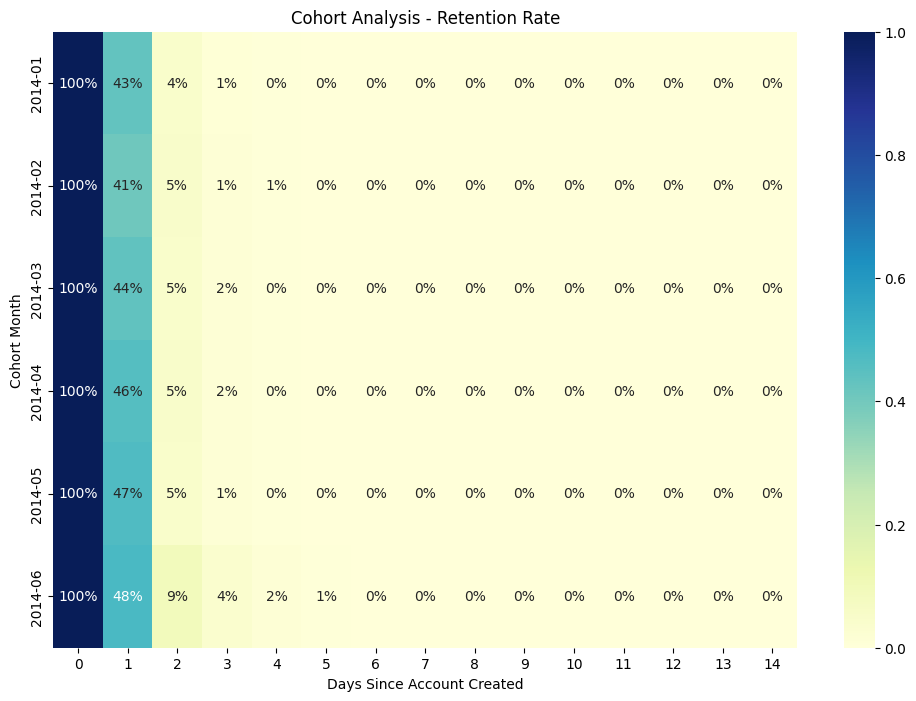

In [54]:
# Convert date columns to datetime
data['date_account_created'] = pd.to_datetime(data['date_account_created'], errors='coerce')
data['session_timestamp'] = pd.to_datetime(data['session_timestamp'], errors='coerce')

# Drop rows with invalid date conversions
data = data.dropna(subset=['date_account_created', 'session_timestamp'])

# Create a cohort based on the month of account creation
data['cohort_month'] = data['date_account_created'].dt.to_period('M')

# Calculate the number of days since account creation for each session
data['days_since_created'] = (data['session_timestamp'] - data['date_account_created']).dt.days

# Group data by cohort and days since creation
cohort_data = data.groupby(['cohort_month', 'days_since_created']).agg({'user_id': 'nunique'}).reset_index()

# Pivot the data
cohort_pivot = cohort_data.pivot(index='cohort_month', columns='days_since_created', values='user_id').fillna(0)

# Calculate the number of users in each cohort
cohort_sizes = cohort_pivot.iloc[:, 0]

# Calculate retention rate
retention = cohort_pivot.divide(cohort_sizes, axis=0)

# Plot retention rate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt=".0%", cmap="YlGnBu")
plt.title('Cohort Analysis - Retention Rate')
plt.xlabel('Days Since Account Created')
plt.ylabel('Cohort Month')
plt.show()

이전 했던것과 동일 폐기

In [60]:
# Define the retention period (e.g., 7 days)
retention_period = 10

# Calculate rolling retention rate
rolling_retained_users = data[data['days_since_created'] <= retention_period]['user_id'].nunique()
rolling_retention_rate = rolling_retained_users / initial_users

print(f"{retention_period}-day rolling retention rate: {rolling_retention_rate:.2%}")

10-day rolling retention rate: 49.72%


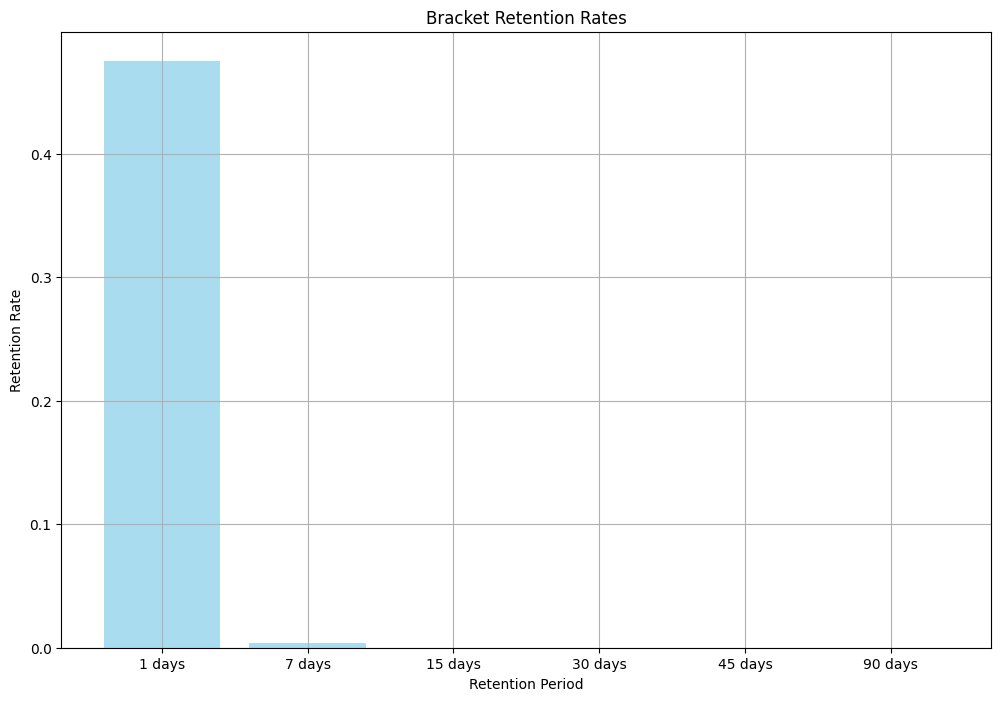

In [61]:
# Convert date columns to datetime
data['date_account_created'] = pd.to_datetime(data['date_account_created'], errors='coerce')
data['session_timestamp'] = pd.to_datetime(data['session_timestamp'], errors='coerce')

# Drop rows with invalid date conversions
data = data.dropna(subset=['date_account_created', 'session_timestamp'])

# Calculate the number of days since account creation for each session
data['days_since_created'] = (data['session_timestamp'] - data['date_account_created']).dt.days

# Define the retention periods
retention_periods = [1, 7, 15, 30, 45, 90]

# Calculate initial users (users who had a session on day 0)
initial_users = data[data['days_since_created'] == 0]['user_id'].nunique()

# Calculate bracket retention rates
retention_rates = []
for period in retention_periods:
    retained_users = data[data['days_since_created'] >= period]['user_id'].nunique()
    retention_rate = retained_users / initial_users
    retention_rates.append(retention_rate)

# Plot the bracket retention rates
plt.figure(figsize=(12, 8))
plt.bar(range(len(retention_periods)), retention_rates, color='skyblue', alpha=0.7)
plt.xticks(range(len(retention_periods)), [f'{period} days' for period in retention_periods])
plt.xlabel('Retention Period')
plt.ylabel('Retention Rate')
plt.title('Bracket Retention Rates')
plt.grid(True)
plt.show()